In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dense, Flatten, Dropout,AveragePooling2D

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow import keras

In [6]:
from sklearn.metrics import classification_report

In [7]:
from math import ceil

In [8]:
from itertools import islice

# Look at the data to see how to adjust it

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random

take a look at a random image

In [10]:
listdir = os.listdir(r'D:\vscode workspace\cv project\src\Video\Images\train\boost')

In [11]:
path = random.choice(listdir)

In [12]:
path

'b8i41.png'

In [13]:
img = cv2.imread(r'D:\vscode workspace\cv project\src\Video\Images\train\boost\\' + path)

In [14]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

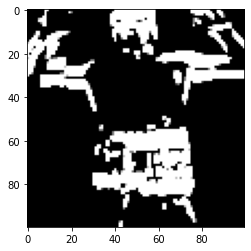

In [15]:
plt.imshow(img, cmap='gray')

In [16]:
img.max()

255

we will need to shift the values from `[0, 255]` to `[0, 1]`

# Load the data from the folders
### by using keras preprocessing tools

make an image data generator to make the machine more robust

In [17]:
image_gen = ImageDataGenerator(
    rotation_range= 35,
    height_shift_range= 0.3,
    width_shift_range= 0.2,
    zoom_range= 0.3,
    horizontal_flip= True,
    vertical_flip= True,
    fill_mode='constant',
    cval= 0.0,
    rescale= 1/255  # shifting the values range                               
)

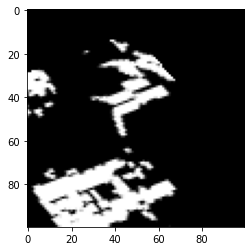

In [18]:
plt.imshow(image_gen.random_transform(img), 'gray')

In [19]:
INPUT_SHAPE = (100, 100, 1)

load the data from the folders and invoke the transformations on it

In [21]:
batch_size = 48
train_image_gen = image_gen.flow_from_directory(
    r'D:\vscode workspace\cv project\src\Video\Images\train',
    # the picture size is (100, 100)
    target_size= INPUT_SHAPE[:2],
    # there are 3 classes 
    class_mode='categorical',
    color_mode= 'grayscale',
    # when the fit function will request images, 
    # this generator will give it a tensor of 
    # 24 images
    batch_size=batch_size
    )

test_image_gen = image_gen.flow_from_directory(
    r'D:\vscode workspace\cv project\src\Video\Images\test',
    target_size= INPUT_SHAPE[:2],
    class_mode='categorical',
    color_mode= 'grayscale',
    batch_size=batch_size
    )

Found 5748 images belonging to 3 classes.
Found 888 images belonging to 3 classes.


In [22]:
train_image_gen

In [23]:
train_image_gen.class_indices

{'boost': 0, 'click': 1, 'upgrade': 2}

# Create the model




  

  

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation= 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

# the output layer:
# it will return a 3 float-type list
# at the 0th index will be the probability that the img is a boost
# at the 1st index will be the probability that the img is a click
# at the 2nd index will be the probability that the img is an upgrade
model.add(Dense(3, activation='softmax'))

In [24]:
model.compile(
    # this loss function categorical because there are 
    # more than 2 classes to classify between
    loss='categorical_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

## Train the model
### using the image generator

In [25]:
results = model.fit(x=train_image_gen,
                  epochs= 25,
                  validation_data= test_image_gen)

Epoch 1/25
240/240 [==============================] - 53s 213ms/step - loss: 0.7901 - accuracy: 0.6243 - precision: 0.6686 - recall: 0.5248 - val_loss: 0.4728 - val_accuracy: 0.8097 - val_precision: 0.8260 - val_recall: 0.7804
Epoch 2/25
240/240 [==============================] - 22s 93ms/step - loss: 0.5331 - accuracy: 0.7703 - precision: 0.7862 - recall: 0.7497 - val_loss: 0.4375 - val_accuracy: 0.8007 - val_precision: 0.8092 - val_recall: 0.7928
Epoch 3/25
240/240 [==============================] - 22s 92ms/step - loss: 0.4671 - accuracy: 0.8123 - precision: 0.8224 - recall: 0.7908 - val_loss: 0.3630 - val_accuracy: 0.8615 - val_precision: 0.8669 - val_recall: 0.8435
Epoch 4/25
240/240 [==============================] - 22s 93ms/step - loss: 0.4466 - accuracy: 0.8110 - precision: 0.8219 - recall: 0.7960 - val_loss: 0.3557 - val_accuracy: 0.8502 - val_precision: 0.8558 - val_recall: 0.8423
Epoch 5/25
240/240 [==============================] - 23s 94ms/step - loss: 0.4007 - accuracy: 

# Tests and Performance

In [26]:
test_loss, test_pre, test_rec, test_acc = model.evaluate(test_image_gen, verbose=2)

37/37 - 1s - loss: 0.2327 - accuracy: 0.9088 - precision: 0.9106 - recall: 0.9065


In [27]:
test_image_gen = image_gen.flow_from_directory(r'D:\vscode workspace\cv project\src\Video\Images\test',
                                               target_size= INPUT_SHAPE[:2],
                                               class_mode =  'categorical',
                                               color_mode =  'grayscale',
                                               batch_size =  100
                                            )
imgs, labels = test_image_gen.next()
labels = np.argmax(labels, axis=-1)
print(f'imgs = {imgs.shape}, labels = {labels.shape}')

predictions = np.argmax(model.predict(imgs), axis= -1)
print(predictions.shape)


print(classification_report(labels, predictions,
                            target_names= ['boost', 'click', 'upgrade']))

Found 888 images belonging to 3 classes.
imgs = (100, 100, 100, 1), labels = (100,)
(100,)
              precision    recall  f1-score   support

       boost       1.00      1.00      1.00        34
       click       0.88      1.00      0.94        30
     upgrade       1.00      0.89      0.94        36

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [28]:
# get a random image
listdir = os.listdir(r'D:\vscode workspace\cv project\src\Video\Images\test\boost')
image = random.choice(listdir)

path = os.path.normpath(r'D:\vscode workspace\cv project\src\Video\Images\test\boost' + '\\' + image)
img = cv2.imread(path)

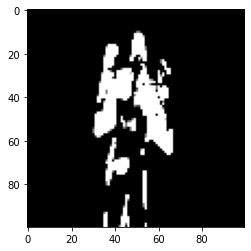

In [29]:
plt.imshow(img, 'gray')

In [30]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/ 255

In [31]:
print(img.shape)
img = img.reshape((1,100, 100, 1))
print(img.shape)

(100, 100)
(1, 100, 100, 1)


In [32]:
np.argmax(model.predict(img)) # 0 for boost (jump)

0

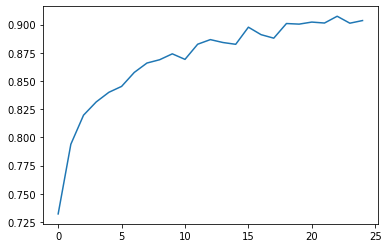

In [34]:
plt.plot(results.history['precision'])

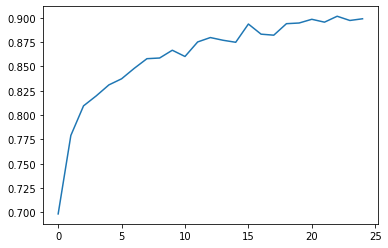

In [35]:
plt.plot(results.history['accuracy'])

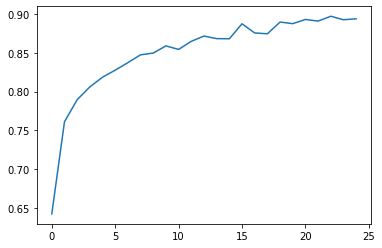

In [36]:
plt.plot(results.history['recall'])

# Save the model

In [37]:
model.save(os.path.normpath('D:\\vscode workspace\\cv project\\src\\Video\\medmodel.h5'))

# LeNet 5 model
using this [proposed implementation](https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342)
### Create

In [42]:
lenet = Sequential()

lenet.add(Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=INPUT_SHAPE, padding='same')) # C1
lenet.add(keras.layers.AveragePooling2D())                                                                  # S2

lenet.add(Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'))                         # C3
lenet.add(keras.layers.AveragePooling2D())                                                                  # S4

lenet.add(Flatten())

lenet.add(Dense(120, activation='tanh'))                                                                    # F5
lenet.add(Dense(84, activation='tanh'))                                                                     # F6
lenet.add(Dense(3, activation= 'softmax'))                                                                  # F7

In [44]:
lenet.compile(
    # this loss function categorical because there are 
    # more than 2 classes to classify between
    loss='categorical_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [45]:
lenet.fit(x=train_image_gen,
          epochs= 10,
          validation_data= test_image_gen)

Epoch 1/10
240/240 [==============================] - 18s 73ms/step - loss: 0.7356 - accuracy: 0.6483 - precision_1: 0.6929 - recall_1: 0.5827 - val_loss: 0.4832 - val_accuracy: 0.8029 - val_precision_1: 0.8093 - val_recall_1: 0.7838
Epoch 2/10
240/240 [==============================] - 17s 70ms/step - loss: 0.4723 - accuracy: 0.7973 - precision_1: 0.8104 - recall_1: 0.7827 - val_loss: 0.4109 - val_accuracy: 0.8423 - val_precision_1: 0.8478 - val_recall_1: 0.8277
Epoch 3/10
240/240 [==============================] - 17s 71ms/step - loss: 0.4313 - accuracy: 0.8238 - precision_1: 0.8363 - recall_1: 0.8089 - val_loss: 0.3857 - val_accuracy: 0.8525 - val_precision_1: 0.8624 - val_recall_1: 0.8401
Epoch 4/10
240/240 [==============================] - 17s 71ms/step - loss: 0.4165 - accuracy: 0.8262 - precision_1: 0.8359 - recall_1: 0.8122 - val_loss: 0.4110 - val_accuracy: 0.8367 - val_precision_1: 0.8439 - val_recall_1: 0.8221
Epoch 5/10
240/240 [==============================] - 17s 71ms/s

In [46]:
test_image_gen = image_gen.flow_from_directory(r'D:\vscode workspace\cv project\src\Video\Images\test',
                                               target_size= INPUT_SHAPE[:2],
                                               class_mode =  'categorical',
                                               color_mode =  'grayscale',
                                               batch_size =  100
                                            )
imgs, labels = test_image_gen.next()
labels = np.argmax(labels, axis=-1)
print(f'imgs = {imgs.shape}, labels = {labels.shape}')

predictions = np.argmax(lenet.predict(imgs), axis= -1)
print(predictions.shape)


print(classification_report(labels, predictions,
                            target_names= ['boost', 'click', 'upgrade']))

Found 888 images belonging to 3 classes.
imgs = (100, 100, 100, 1), labels = (100,)
(100,)
              precision    recall  f1-score   support

       boost       0.94      0.86      0.90        36
       click       0.81      0.91      0.86        33
     upgrade       0.97      0.94      0.95        31

    accuracy                           0.90       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.90      0.90       100



In [47]:
test_loss, test_pre, test_rec, test_acc = lenet.evaluate(test_image_gen, verbose=2)

9/9 - 1s - loss: 0.3286 - accuracy: 0.8761 - precision_1: 0.8838 - recall_1: 0.8649


In [48]:
lenet.save(os.path.normpath('D:\\vscode workspace\\cv project\\src\\Video\\LeNet-5.h5'))

# the big one:

In [24]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5,5), activation= 'relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

# the output layer:
# it will return a 3 float-type list
# at the 0th index will be the probability that the img is a boost
# at the 1st index will be the probability that the img is a click
# at the 2nd index will be the probability that the img is an upgrade
model.add(Dense(3, activation='softmax'))

In [25]:
model.compile(
    # this loss function categorical because there are 
    # more than 2 classes to classify between
    loss='categorical_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [26]:
results = model.fit(x=train_image_gen,
                  epochs= 50,
                  validation_data= test_image_gen)

Epoch 1/50
120/120 [==============================] - 41s 331ms/step - loss: 0.8145 - accuracy: 0.5798 - precision: 0.7111 - recall: 0.4378 - val_loss: 0.5156 - val_accuracy: 0.7782 - val_precision: 0.7905 - val_recall: 0.7646
Epoch 2/50
120/120 [==============================] - 38s 313ms/step - loss: 0.5293 - accuracy: 0.7757 - precision: 0.7948 - recall: 0.7522 - val_loss: 0.5143 - val_accuracy: 0.7759 - val_precision: 0.7907 - val_recall: 0.7658
Epoch 3/50
120/120 [==============================] - 38s 313ms/step - loss: 0.4803 - accuracy: 0.7953 - precision: 0.8172 - recall: 0.7718 - val_loss: 0.3818 - val_accuracy: 0.8491 - val_precision: 0.8732 - val_recall: 0.8142
Epoch 4/50
120/120 [==============================] - 38s 315ms/step - loss: 0.4197 - accuracy: 0.8217 - precision: 0.8371 - recall: 0.7973 - val_loss: 0.3621 - val_accuracy: 0.8626 - val_precision: 0.8721 - val_recall: 0.8446
Epoch 5/50
120/120 [==============================] - 38s 314ms/step - loss: 0.3983 - accura

In [27]:
test_image_gen = image_gen.flow_from_directory(r'D:\vscode workspace\cv project\src\Video\Images\test',
                                               target_size= INPUT_SHAPE[:2],
                                               class_mode =  'categorical',
                                               color_mode =  'grayscale',
                                               batch_size =  1000
                                            )
imgs, labels = test_image_gen.next()
labels = np.argmax(labels, axis=-1)
print(f'imgs = {imgs.shape}, labels = {labels.shape}')

predictions = np.argmax(model.predict(imgs), axis= -1)
print(predictions.shape)


print(classification_report(labels, predictions,
                            target_names= ['boost', 'click', 'upgrade']))

Found 888 images belonging to 3 classes.
imgs = (888, 100, 100, 1), labels = (888,)
(888,)
              precision    recall  f1-score   support

       boost       0.97      0.97      0.97       296
       click       0.95      0.96      0.95       296
     upgrade       0.98      0.97      0.98       296

    accuracy                           0.97       888
   macro avg       0.97      0.97      0.97       888
weighted avg       0.97      0.97      0.97       888



In [28]:
model.save(os.path.normpath('D:\\vscode workspace\\cv project\\src\\Video\\Models\\bigmodel.h5'))